This is part of the project completed during my Certificaate Program in Big Data Analytics at the York University, Torornto, Canada. A comprehensive project submission was made for mark in the last course in a PDF formar. This is the code aspect of the project. 

I believe this can benefit young and aspiring Data Science in this Field. 


# Telco Customer Churn Data Set

This Tutorial makes use of Teleco Customer Churn Data set, where the aim is to predict the customer that would churn or not.

# Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

# Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

This dataset used in this Project can be downloaded from this link on kaggle.com - https://www.kaggle.com/blastchar/telco-customer-churn

This project code consists of data preparation, and used different Machine Learning Techniques such as 
- Decision Tree
- Logistic Regression
- Random Forest
- K-Means Clustering 
The parameter were adjusted like three times in order to get good accuracy, e.g, like the Decision Tree, three decision tree model were developed and model evaluation were used to predict the best among the three model by adjucting the parameters. The Model Evaluation Models used are - Precision, Recall, ROC AUC, Confusion Matrix, Accuracy.

# Importing Python Libraries 

In [305]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # this is used for the plot the graph 

import seaborn as sns # used for plot interactive graph.

import os

from pandas import Series, DataFrame

import scipy

from scipy.stats import spearmanr

import sklearn
from sklearn.preprocessing import scale                # importing scale function
from sklearn.model_selection import train_test_split  # from cross validation module we import split train and test  
from sklearn import metrics                            # importing metrics to evaluate the model
from sklearn import preprocessing                      # importing preprocessing tools
from sklearn.preprocessing import StandardScaler       # Standard Scaling for fit_transform for large value

import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams

import plotly.graph_objs as go #- no module error
import plotly.offline as po #- no module error

import pandas_profiling  #- no module error
from pandas_profiling import ProfileReport

%matplotlib inline

In [306]:
# Loading the dataset

data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [307]:
data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes                No             DSL            Yes   
2             Yes                No             DSL            Yes   
3              No  No phone service             DSL            Yes   
4             Yes                No     Fiber optic             No   
...           ...               ...             ...            ...   
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges TotalCharges Churn  
0              29.85        29.85    No  
1              56.95       1889.5    No  
2              53.85       108.15   Yes  
3              42.30      1840.75    No  
4              70.70       151.65   Yes  
...              ...          ...   ...  
7038           84.80       1990.5    No  
7039          103.20       7362.9    No  
7040           29.60       346.45    No  
7041           74.40        306.6   Yes  
7042          105.65       6844.5    No  

[7043 rows x 21 columns]

In [308]:
data.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   
5               Yes     Fiber optic             No           No   
6               Yes     Fiber optic             No          Yes   
7  No phone service             DSL            Yes           No   
8               Yes     Fiber optic             No           No   
9                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   
5              Yes          No         Yes             Yes  Month-to-month   
6               No          No         Yes              No  Month-to-month   
7               No          No          No              No  Month-to-month   
8              Yes         Yes         Yes             Yes  Month-to-month   
9               No          No          No              No        One year   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   
5              Yes           Electronic check           99.65        820.5   
6              Yes    Credit card (automatic)           89.10       1949.4   
7               No               Mailed check           29.75        301.9   
8              Yes           Electronic check          104.80      3046.05   
9               No  Bank transfer (automatic)           56.15      3487.95   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes  
5   Yes  
6    No  
7    No  
8   Yes  
9    No

In [309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [310]:
# Getting the basic statistics of the numerical columns
data.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [311]:
data.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL    

In [312]:
# Perform Exploratory Data Analysis in just one line of code

pandas_profiling.ProfileReport(pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv'))

# Correlation Matrix Among the Variables/Features

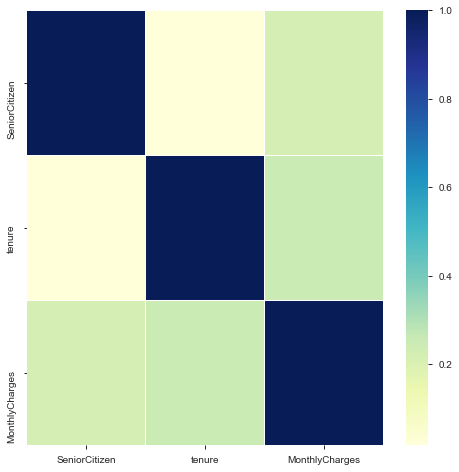

In [313]:
corrmat = data.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.3)

The correlation matrix shows that the data follows a roughly straight-line trend. Therefore, the variables have an approxomately linear relationship.There is no correlation between two variables (where correlation is 0 or near 0). The darkest blue means there is a perfect positive correlation while light yellow means there is a perfect negative correlation.

From correlation matrix, features like Tenure, Monthly charges and Total charges are highly correlated with services like Multiple Phone Lines services and Internet services like Online Security, Online Backup, Device Protection, Tech Support, Streaming TV and Streaming Movies services.

In [314]:
# check missing values in data
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Customer ID contains no specific information about any customer hence we need to drop this column from our dataset uisng the code below

In [315]:
data=data.drop(['customerID'], axis=1)

In [316]:
# To check again if the Customer ID column has been dropped using data.head()

data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

Since the Target Variable is "Churn" - i.e. To determine if a customer will leave the service of "It’s Gonna Get Better (IGGB)" or continue to use the service. 

The next code shows us the proportion of the people opting out of "IGGB" Telecom services using a simple bar chart to show the distribution of the two classes in the data set.

<function matplotlib.pyplot.show(*args, **kw)>

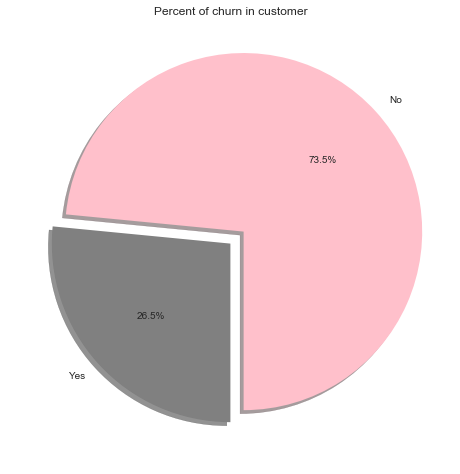

In [317]:
# Data to plot for the % of target variable

labels =data['Churn'].value_counts(sort = True).index
sizes = data['Churn'].value_counts(sort = True)
colors = ["pink","gray"]

explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,10

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of churn in customer')
plt.show

26.5% of the customer churn while 73.5% of the customer stay with the telecom company. 

In [318]:
# We have to Convert the target class to 1’s and 0's because machine learning does not understand categorical variables

data['Churn'] = data['Churn'].map(lambda s :1  if s =='Yes' else 0)

In [319]:
# To check if the target variable/class "Churn" has been converted to 1's and 0's

data.head(10)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   
5  Female              0      No         No       8          Yes   
6    Male              0      No        Yes      22          Yes   
7  Female              0      No         No      10           No   
8  Female              0     Yes         No      28          Yes   
9    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   
5               Yes     Fiber optic             No           No   
6               Yes     Fiber optic             No          Yes   
7  No phone service             DSL            Yes           No   
8               Yes     Fiber optic             No           No   
9                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   
5              Yes          No         Yes             Yes  Month-to-month   
6               No          No         Yes              No  Month-to-month   
7               No          No          No              No  Month-to-month   
8              Yes         Yes         Yes             Yes  Month-to-month   
9               No          No          No              No        One year   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   
5              Yes           Electronic check           99.65        820.5   
6              Yes    Credit card (automatic)           89.10       1949.4   
7               No               Mailed check           29.75        301.9   
8              Yes           Electronic check          104.80      3046.05   
9               No  Bank transfer (automatic)           56.15      3487.95   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1  
5      1  
6      0  
7      0  
8      1  
9      0

# Preprocessing Gender

The 'Gender' column have categorical values and we have to convert the categorical value to numeric value using the pandas tools "get_dummies() function" and this allows one hot encoding to be done on the values present in the column.

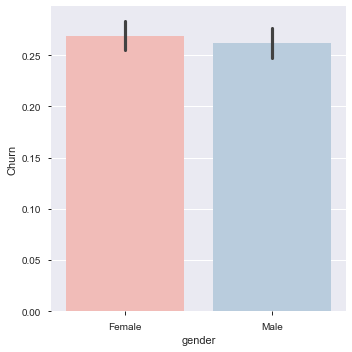

In [320]:
# Converting the "Gender" categorical values to numeric values

data['gender'].unique()
gender = sns.factorplot(y="Churn", x="gender",data= data,kind="bar" ,palette = "Pastel1")

# Using get_dummies () function to do the conversion 
data = pd.get_dummies(data=data, columns=['gender'])

In [321]:
# To confirm if the 'Gender column' has been converted to dummies variables

data.head()

SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines  \
0              0     Yes         No       1           No  No phone service   
1              0      No         No      34          Yes                No   
2              0      No         No       2          Yes                No   
3              0      No         No      45           No  No phone service   
4              0      No         No       2          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges  Churn  \
0           Electronic check           29.85        29.85      0   
1               Mailed check           56.95       1889.5      0   
2               Mailed check           53.85       108.15      1   
3  Bank transfer (automatic)           42.30      1840.75      0   
4           Electronic check           70.70       151.65      1   

   gender_Female  gender_Male  
0              1            0  
1              0            1  
2              0            1  
3              0            1  
4              1            0

Based on the proportion of male and female churn, The variable is not informative. Therefore, it is very difficult to decide if a customer is going to stop using the service or not 

# Preprocessing Partner column
The 'Partner' column has Yes or No Values, since we have only two categorical values in the column, the categorical variable Yes or No will be replaced by 1's and 0's. Since the categorical variables is not more than two, no need to use 'one hot encoding for the values. 

In [322]:
# Converting the categorical values to 1's and 0's
data['Partner'] = data['Partner'].map(lambda s :1  if s =='Yes' else 0)

In [323]:
# To check if the categorical values in 'Partner' column has changed to 1's and 0's

data.head()

SeniorCitizen  Partner Dependents  tenure PhoneService     MultipleLines  \
0              0        1         No       1           No  No phone service   
1              0        0         No      34          Yes                No   
2              0        0         No       2          Yes                No   
3              0        0         No      45           No  No phone service   
4              0        0         No       2          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges  Churn  \
0           Electronic check           29.85        29.85      0   
1               Mailed check           56.95       1889.5      0   
2               Mailed check           53.85       108.15      1   
3  Bank transfer (automatic)           42.30      1840.75      0   
4           Electronic check           70.70       151.65      1   

   gender_Female  gender_Male  
0              1            0  
1              0            1  
2              0            1  
3              0            1  
4              1            0

# Processing This Columns (Dependents, Phone Service and Paperless Billing Variables)

Since the 'Dependents', 'Phone Service' and 'Paperless Billing' columns contain only two categorical values. The Categorical value can be converted to numeric values of 1's and 0's using the combination of codes below. No need for applying 'one hot encoding' since the categorical variables is not more than two. 

In [324]:
data['Dependents'] = data['Dependents'].map(lambda s :1  if s =='Yes' else 0)
data['PhoneService'] = data['PhoneService'].map(lambda s :1  if s =='Yes' else 0)
data['PaperlessBilling'] = data['PaperlessBilling'].map(lambda s :1  if s =='Yes' else 0)

In [325]:
data.shape
    
# To see the entire columns, becuase by default, pandas will show 20 columns, we use this code

pd.set_option('display.max_columns', 24)

# To confirm if the dependents, phone service and paperless billing columns have chaanged to 1's and 0's
data.head()

SeniorCitizen  Partner  Dependents  tenure  PhoneService     MultipleLines  \
0              0        1           0       1             0  No phone service   
1              0        0           0      34             1                No   
2              0        0           0       2             1                No   
3              0        0           0      45             0  No phone service   
4              0        0           0       2             1                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract  PaperlessBilling  \
0          No              No  Month-to-month                 1   
1          No              No        One year                 0   
2          No              No  Month-to-month                 1   
3          No              No        One year                 0   
4          No              No  Month-to-month                 1   

               PaymentMethod  MonthlyCharges TotalCharges  Churn  \
0           Electronic check           29.85        29.85      0   
1               Mailed check           56.95       1889.5      0   
2               Mailed check           53.85       108.15      1   
3  Bank transfer (automatic)           42.30      1840.75      0   
4           Electronic check           70.70       151.65      1   

   gender_Female  gender_Male  
0              1            0  
1              0            1  
2              0            1  
3              0            1  
4              1            0

# The Tenure Distribution Using the 'Tenure' Column'

# To Analyse How Long or Number of Months a Person Has Stayed in the IGGB Company

The number of months variable will be analysed in order to understand the churn of the customers. The distribution chart will be plotted using the seaborn library in python.

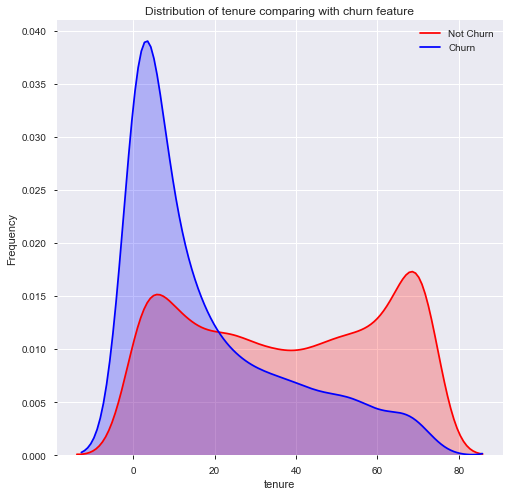

In [326]:
# Analysing the tenure distibution 

fig = plt.figure(figsize=(8, 8))
tenure_dist= sns.kdeplot(data.tenure[(data["Churn"] == 0) ], color="Red", shade = True)
tenure_dist= sns.kdeplot(data.tenure[(data["Churn"] == 1) ], ax =tenure_dist, color="Blue", shade= True)
tenure_dist.set_xlabel("tenure")
tenure_dist.set_ylabel("Frequency")
plt.title('Distribution of tenure comparing with churn feature')
tenure_dist= tenure_dist.legend(["Not Churn","Churn"])

Based on the data visualization for 'Tenure' column, it shows that most customer leave the telecom services before 20 months. This indicate that there is possibility that if customer stayed using Telecom Service for more than 20 months, it is greatly unlikely that the customer might leave.

# Preprocessing the "Multiplelines" variable
The telephone lines variables will be converted or replaced using dummy values

In [327]:
data['MultipleLines'].replace('No phone service','No', inplace=True)
data['MultipleLines'] = data['MultipleLines'].map(lambda s :1  if s =='Yes' else 0)

# Preprocessing the "Internet Service" Variable

Since the internet service values contains three categorical values, the categorical variables will be converted into dummy values.

In [328]:
data['Has_InternetService'] = data['InternetService'].map(lambda s :0  if s =='No' else 1)
data['Fiber_optic'] = data['InternetService'].map(lambda s :1  if s =='Fiber optic' else 0)
data['DSL'] = data['InternetService'].map(lambda s :1  if s =='DSL' else 0)

In [329]:
data.head()

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
0              0        1           0       1             0              0   
1              0        0           0      34             1              0   
2              0        0           0       2             1              0   
3              0        0           0      45             0              0   
4              0        0           0       2             1              0   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract  PaperlessBilling  \
0          No              No  Month-to-month                 1   
1          No              No        One year                 0   
2          No              No  Month-to-month                 1   
3          No              No        One year                 0   
4          No              No  Month-to-month                 1   

               PaymentMethod  MonthlyCharges TotalCharges  Churn  \
0           Electronic check           29.85        29.85      0   
1               Mailed check           56.95       1889.5      0   
2               Mailed check           53.85       108.15      1   
3  Bank transfer (automatic)           42.30      1840.75      0   
4           Electronic check           70.70       151.65      1   

   gender_Female  gender_Male  Has_InternetService  Fiber_optic  DSL  
0              1            0                    1            0    1  
1              0            1                    1            0    1  
2              0            1                    1            0    1  
3              0            1                    1            0    1  
4              1            0                    1            1    0

In [330]:
# Since dummies has been created for the 'InternetService' variables, they can be dropped

data = data.drop(['InternetService'], 1)

In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SeniorCitizen        7043 non-null   int64  
 1   Partner              7043 non-null   int64  
 2   Dependents           7043 non-null   int64  
 3   tenure               7043 non-null   int64  
 4   PhoneService         7043 non-null   int64  
 5   MultipleLines        7043 non-null   int64  
 6   OnlineSecurity       7043 non-null   object 
 7   OnlineBackup         7043 non-null   object 
 8   DeviceProtection     7043 non-null   object 
 9   TechSupport          7043 non-null   object 
 10  StreamingTV          7043 non-null   object 
 11  StreamingMovies      7043 non-null   object 
 12  Contract             7043 non-null   object 
 13  PaperlessBilling     7043 non-null   int64  
 14  PaymentMethod        7043 non-null   object 
 15  MonthlyCharges       7043 non-null   f

# Preprocessing These Columns (OnlineSecurity, OnlineBackup,  DeviceProtection, TechSupport, StreamingTV, StreamingMovie)

The listed columns contain two categorical values and it will be converted into 1's and 0's 

In [332]:
data['OnlineSecurity'] = data['OnlineSecurity'].map(lambda s :1  if s =='Yes' else 0)
data['OnlineBackup'] = data['OnlineBackup'].map(lambda s :1  if s =='Yes' else 0)
data['DeviceProtection'] = data['DeviceProtection'].map(lambda s :1  if s =='Yes' else 0)
data['TechSupport'] = data['TechSupport'].map(lambda s :1  if s =='Yes' else 0)
data['StreamingTV'] = data['StreamingTV'].map(lambda s :1  if s =='Yes' else 0)
data['StreamingMovies'] = data['StreamingMovies'].map(lambda s :1  if s =='Yes' else 0)

In [333]:
data.shape

(7043, 23)

In [334]:
data.head()

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
0              0        1           0       1             0              0   
1              0        0           0      34             1              0   
2              0        0           0       2             1              0   
3              0        0           0      45             0              0   
4              0        0           0       2             1              0   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               0             1                 0            0            0   
1               1             0                 1            0            0   
2               1             1                 0            0            0   
3               1             0                 1            1            0   
4               0             0                 0            0            0   

   StreamingMovies        Contract  PaperlessBilling  \
0                0  Month-to-month                 1   
1                0        One year                 0   
2                0  Month-to-month                 1   
3                0        One year                 0   
4                0  Month-to-month                 1   

               PaymentMethod  MonthlyCharges TotalCharges  Churn  \
0           Electronic check           29.85        29.85      0   
1               Mailed check           56.95       1889.5      0   
2               Mailed check           53.85       108.15      1   
3  Bank transfer (automatic)           42.30      1840.75      0   
4           Electronic check           70.70       151.65      1   

   gender_Female  gender_Male  Has_InternetService  Fiber_optic  DSL  
0              1            0                    1            0    1  
1              0            1                    1            0    1  
2              0            1                    1            0    1  
3              0            1                    1            0    1  
4              1            0                    1            1    0

In [335]:
# Since dummies has been created for the following variables, they can be dropped

data = data.drop(['OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies'], 1)


In [336]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SeniorCitizen        7043 non-null   int64  
 1   Partner              7043 non-null   int64  
 2   Dependents           7043 non-null   int64  
 3   tenure               7043 non-null   int64  
 4   PhoneService         7043 non-null   int64  
 5   MultipleLines        7043 non-null   int64  
 6   Contract             7043 non-null   object 
 7   PaperlessBilling     7043 non-null   int64  
 8   PaymentMethod        7043 non-null   object 
 9   MonthlyCharges       7043 non-null   float64
 10  TotalCharges         7043 non-null   object 
 11  Churn                7043 non-null   int64  
 12  gender_Female        7043 non-null   uint8  
 13  gender_Male          7043 non-null   uint8  
 14  Has_InternetService  7043 non-null   int64  
 15  Fiber_optic          7043 non-null   i

# Preprocessing The Payment and Contract Column/Variables

These columns contains more than two categorical values and needs to be converted to dummy variables using get_dummies () function. This allows one hot encoding to be done on the values present in the column.


In [337]:
data = pd.get_dummies(data=data, columns=['PaymentMethod'])
data = pd.get_dummies(data=data, columns=['Contract'])

In [338]:
data.head()

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
0              0        1           0       1             0              0   
1              0        0           0      34             1              0   
2              0        0           0       2             1              0   
3              0        0           0      45             0              0   
4              0        0           0       2             1              0   

   PaperlessBilling  MonthlyCharges TotalCharges  Churn  gender_Female  \
0                 1           29.85        29.85      0              1   
1                 0           56.95       1889.5      0              0   
2                 1           53.85       108.15      1              0   
3                 0           42.30      1840.75      0              0   
4                 1           70.70       151.65      1              1   

   gender_Male  Has_InternetService  Fiber_optic  DSL  \
0            0                    1            0    1   
1            1                    1            0    1   
2            1                    1            0    1   
3            1                    1            0    1   
4            0                    1            1    0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Contract_Month-to-month  Contract_One year  \
0                           0                        1                  0   
1                           1                        0                  1   
2                           1                        1                  0   
3                           0                        0                  1   
4                           0                        1                  0   

   Contract_Two year  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

# Preprocessing the Monthly Charges and Total Charges Columns

This section used box plot to analyse both the Monthly and Total charges column to understand their effect on the churning of the customers. 

Based on the monthlycharges the box plot assist to identify between the customers who have left using the services and those who have not.

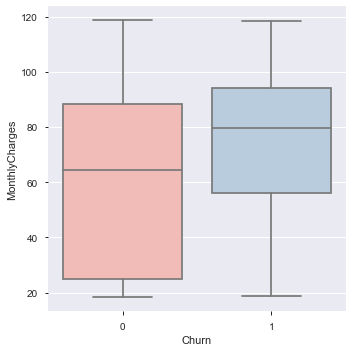

In [339]:
g = sns.factorplot(x="Churn", y = "MonthlyCharges",data = data, kind="box", palette = "Pastel1")

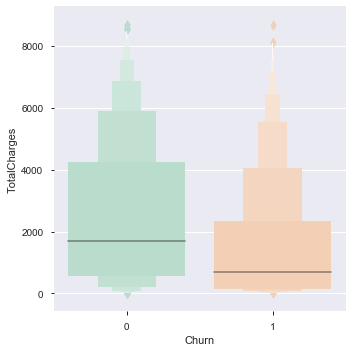

In [340]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
g = sns.factorplot(y="TotalCharges",x="Churn",data=data,kind="boxen", palette = "Pastel2")

In [341]:
data["TotalCharges"] = data["TotalCharges"].astype(float)
data["MonthlyCharges"] = data["MonthlyCharges"].astype(float)

In [342]:
data['TotalCharges_new']= pd.to_numeric(data.TotalCharges,errors='coerce')

In [343]:
#Check NULL values after the conversion
data.loc[pd.isna(data.TotalCharges_new),'TotalCharges']

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

In [344]:
data.loc[pd.isna(data.TotalCharges_new)]

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
488               0        1           1       0             0              0   
753               0        0           1       0             1              0   
936               0        1           1       0             1              0   
1082              0        1           1       0             1              1   
1340              0        1           1       0             0              0   
3331              0        1           1       0             1              0   
3826              0        1           1       0             1              1   
4380              0        1           1       0             1              0   
5218              0        1           1       0             1              0   
6670              0        1           1       0             1              1   
6754              0        0           1       0             1              1   

      PaperlessBilling  MonthlyCharges  TotalCharges  Churn  gender_Female  \
488                  1           52.55           NaN      0              1   
753                  0           20.25           NaN      0              0   
936                  0           80.85           NaN      0              1   
1082                 0           25.75           NaN      0              0   
1340                 0           56.05           NaN      0              1   
3331                 0           19.85           NaN      0              0   
3826                 0           25.35           NaN      0              0   
4380                 0           20.00           NaN      0              1   
5218                 1           19.70           NaN      0              0   
6670                 0           73.35           NaN      0              1   
6754                 1           61.90           NaN      0              0   

      gender_Male  Has_InternetService  Fiber_optic  DSL  \
488             0                    1            0    1   
753             1                    0            0    0   
936             0                    1            0    1   
1082            1                    0            0    0   
1340            0                    1            0    1   
3331            1                    0            0    0   
3826            1                    0            0    0   
4380            0                    0            0    0   
5218            1                    0            0    0   
6670            0                    1            0    1   
6754            1                    1            0    1   

      PaymentMethod_Bank transfer (automatic)  \
488                                         1   
753                                         0   
936                                         0   
1082                                        0   
1340                                        0   
3331                                        0   
3826                                        0   
4380                                        0   
5218                                        0   
6670                                        0   
6754                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
488                                       0                               0   
753                                       0                               0   
936                                       0                               0   
1082                                      0                               0   
1340                                      1                               0   
3331                                      0                               0   
3826                                      0                               0   
4380                                      0                               0   
5218                                      0                               0

In [345]:
data.loc[:,'TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [346]:
#Fill 11 Missing values from the original column
TotalCharges_Missing=[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]
data.loc[pd.isnull(data.TotalCharges_new),'TotalCharges_new']=TotalCharges_Missing

In [347]:
data.TotalCharges=data.TotalCharges_new
data.drop(['TotalCharges_new'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   MultipleLines                            7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float64
 9   Churn                                    7043 non-null   int64  
 10  gender_Female                            7043 no

In [348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   MultipleLines                            7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float64
 9   Churn                                    7043 non-null   int64  
 10  gender_Female                            7043 no

In [349]:
data.head()

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
0              0        1           0       1             0              0   
1              0        0           0      34             1              0   
2              0        0           0       2             1              0   
3              0        0           0      45             0              0   
4              0        0           0       2             1              0   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0                 1           29.85         29.85      0              1   
1                 0           56.95       1889.50      0              0   
2                 1           53.85        108.15      1              0   
3                 0           42.30       1840.75      0              0   
4                 1           70.70        151.65      1              1   

   gender_Male  Has_InternetService  Fiber_optic  DSL  \
0            0                    1            0    1   
1            1                    1            0    1   
2            1                    1            0    1   
3            1                    1            0    1   
4            0                    1            1    0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Contract_Month-to-month  Contract_One year  \
0                           0                        1                  0   
1                           1                        0                  1   
2                           1                        1                  0   
3                           0                        0                  1   
4                           0                        1                  0   

   Contract_Two year  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [350]:
data.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'gender_Female', 'gender_Male', 'Has_InternetService',
       'Fiber_optic', 'DSL', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year'],
      dtype='object')

# Building Decision Tree Model

The decision tree classifier will be built using the Decision tree algorithm implemented in the sklearn python package which has an interface that could invoke the decision tree algorithm.


In [351]:

feature_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'gender_Female', 'gender_Male', 
        'Has_InternetService', 'Fiber_optic', 'DSL', 'PaymentMethod_Bank transfer (automatic)',
        'PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
        'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']

X = data[feature_cols]  # feature columns
Y = data.Churn

In [352]:
# Split dataset into training set and test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1) # 75% training and 25% test data

In [353]:
from sklearn.tree import DecisionTreeClassifier        # Import Decision Tree Classifier

# Create Decision Tree classifer object

decision_tree = DecisionTreeClassifier(criterion="gini", max_depth=4)

# Train Decision Tree Classifer

decision_tree = decision_tree.fit(X_train,Y_train)

# Predict the response for test dataset

y_pred = decision_tree.predict(X_test)

# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.794434980124929


# Visualizing the Decision Trees Model

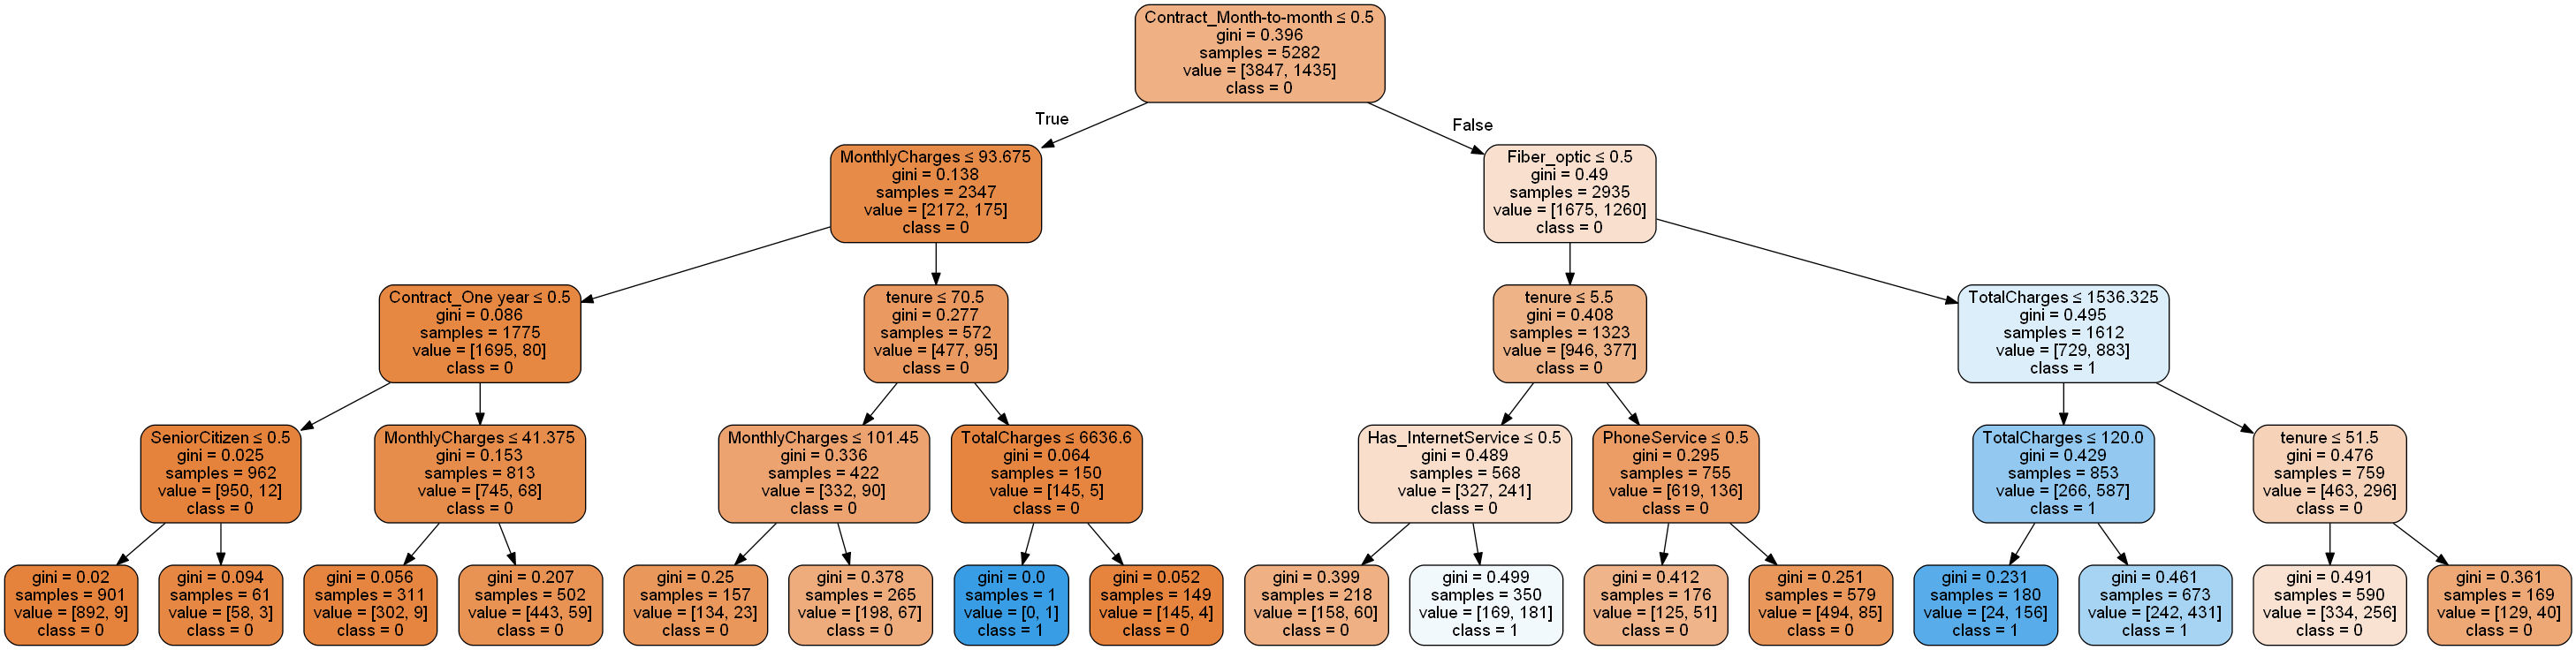

In [354]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

import pydotplus



dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Churn.png')
Image(graph.create_png())

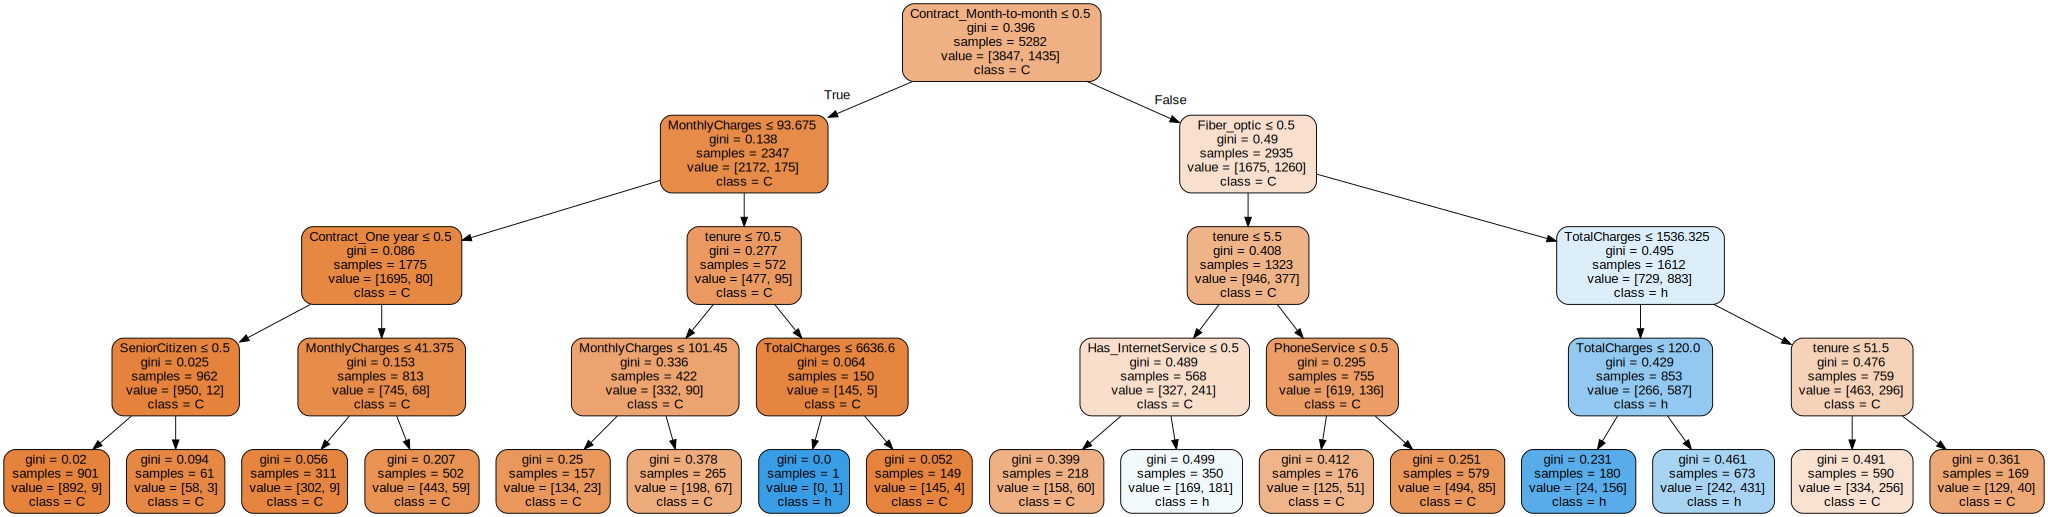

<Figure size 720x720 with 0 Axes>

In [355]:
from sklearn import tree
import graphviz

fig = plt.figure(figsize=(10, 10))

dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                     feature_names=X_train.columns,  
                     class_names="Churn",  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


# The Code Below allows the Decision Tree to Send to the Python Folder in PDF File

In [356]:
from sklearn import tree
import graphviz

fig = plt.figure(figsize=(10, 10))

dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                     feature_names=X_train.columns,  
                     class_names="Churn",  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
graph.render("data")

'data.pdf'

<Figure size 720x720 with 0 Axes>

# Checking the Accuracy of the Model by Making Some Predictions using the "Test Data"
The accuracy of the model was checked by making some prediction on the 'test data' using cross-validation in python library in order to avoid bias while testing the model for accuracy.

In [357]:
#import cross-validation library 'cross_val_score'

from sklearn import tree

from sklearn.model_selection import  cross_val_score

# 10 Folds Cross Validation i.e. the cv=10. NB: The cv parameter can also be modify 

clf_score = cross_val_score(decision_tree, X_train, Y_train, cv=10)

print(clf_score)

clf_score.mean()

[0.79017013 0.79773157 0.79924242 0.76515152 0.80113636 0.80871212
 0.79356061 0.80681818 0.74431818 0.76893939]


0.7875780489202039

# Decision Tree Feature Importance
One great aspect of rule-based learning is that we can actually visualise how important a given feature is towards predicting our target variable. Below code forms a chart showing the relative importance of the features present in the data towards the prediction of our target churn class.

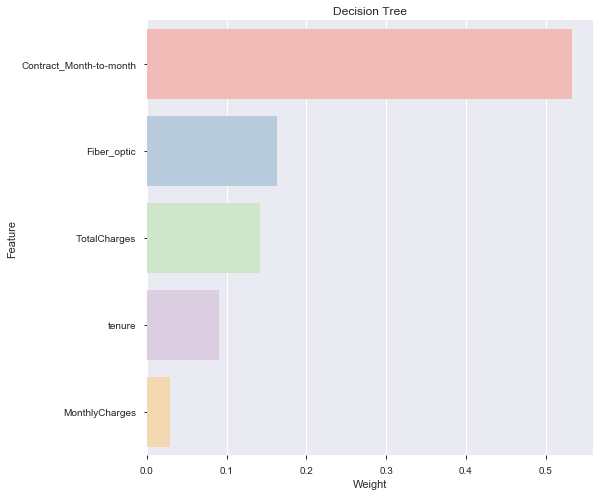

In [358]:
Rfclf_fea = pd.DataFrame(decision_tree.feature_importances_)
Rfclf_fea["Feature"] = list(X_train) 
Rfclf_fea.sort_values(by=0, ascending=False).head()
fig = plt.figure(figsize=(8, 8))
# To use Seaborn to plot the barplot 
g = sns.barplot(0,"Feature",data = Rfclf_fea.sort_values(by=0, ascending=False)[0:5], palette="Pastel1",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("Decision Tree")

# Model Evaluation 
Confusion matrix is used to evaluate the classification the decision tree model, This describe the performance of the classification model or the classifier on the test data for which the true values are known.

In [359]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
y_pred = decision_tree.predict(X_train)
probs = decision_tree.predict_proba(X_train)
print(confusion_matrix(Y_train, y_pred))

[[3412  435]
 [ 666  769]]


# Receiver Operating Characteristic(ROC) curve
The ROC curve for the predictions performed by the decision tree classifier. More the area under the ROC curve, better the prediction capability of the decision tree classifier.

<Figure size 720x576 with 0 Axes>

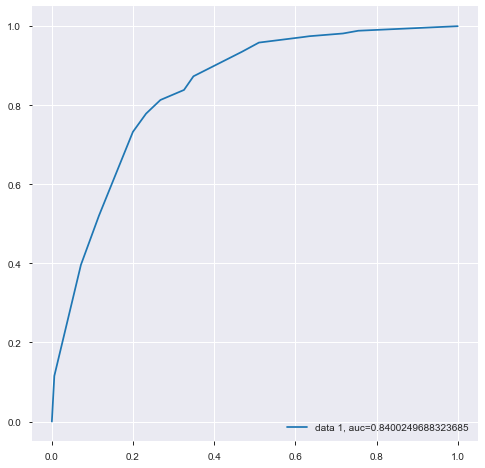

In [360]:
from sklearn.metrics import roc_curve

# Define the size of the figure

fig = plt.figure(figsize=(10, 8))

# Calculate the fpr and tpr for all thresholds of the 

from sklearn.metrics import roc_curve

y_pred_proba_dt = decision_tree.predict_proba(X_test)[::,1]   #Predicted Probability
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba_dt)
auc = metrics.roc_auc_score(Y_test, y_pred_proba_dt)

fig = plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


# Precision-Recall Curve  

The precision vs recall curve on the basis of the predictions. 

A precision-recall curve is a better indicator of the model performance than the ROC curve in case of imbalance in the target variable.

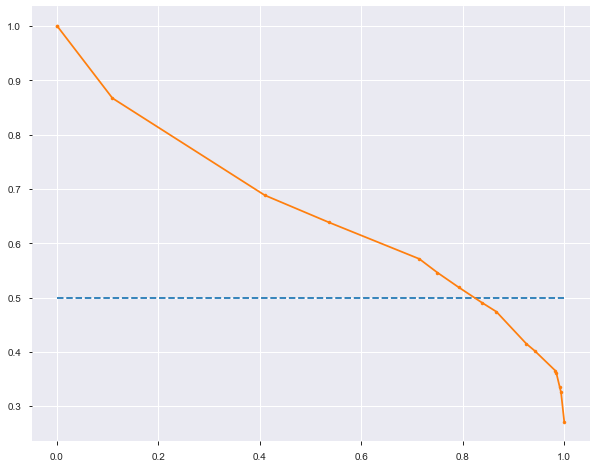

In [361]:
from matplotlib import pyplot

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(Y_train, probs[:,1])

# Define the size of the figure

fig = plt.figure(figsize=(10, 8))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
pyplot.plot(recall, precision, marker='.')

In [362]:
# calculate AUC
auc = roc_auc_score(Y_train, probs[:,1])
print('AUC: %.3f' % auc)
print(Y_train.shape)
print(probs.shape)

AUC: 0.837
(5282,)
(5282, 2)


# Decision Tree - Transforming Some Variables to Produce New Models¶

In [363]:
from sklearn.tree import DecisionTreeClassifier        # Import Decision Tree Classifier

# Create Decision Tree classifer object

decision_tree2 = DecisionTreeClassifier(criterion="gini", max_depth=5)

# Train Decision Tree Classifer

decision_tree2 = decision_tree2.fit(X_train,Y_train)

# Predict the response for test dataset

y_pred_2 = decision_tree2.predict(X_test)

# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_2))

Accuracy: 0.7955706984667802


# Model Evaluation for Second Model - Decision Tree

In [364]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
y_pred_2 = decision_tree2.predict(X_train)
probs_2 = decision_tree2.predict_proba(X_train)
print(confusion_matrix(Y_train, y_pred_2))

[[3573  274]
 [ 810  625]]


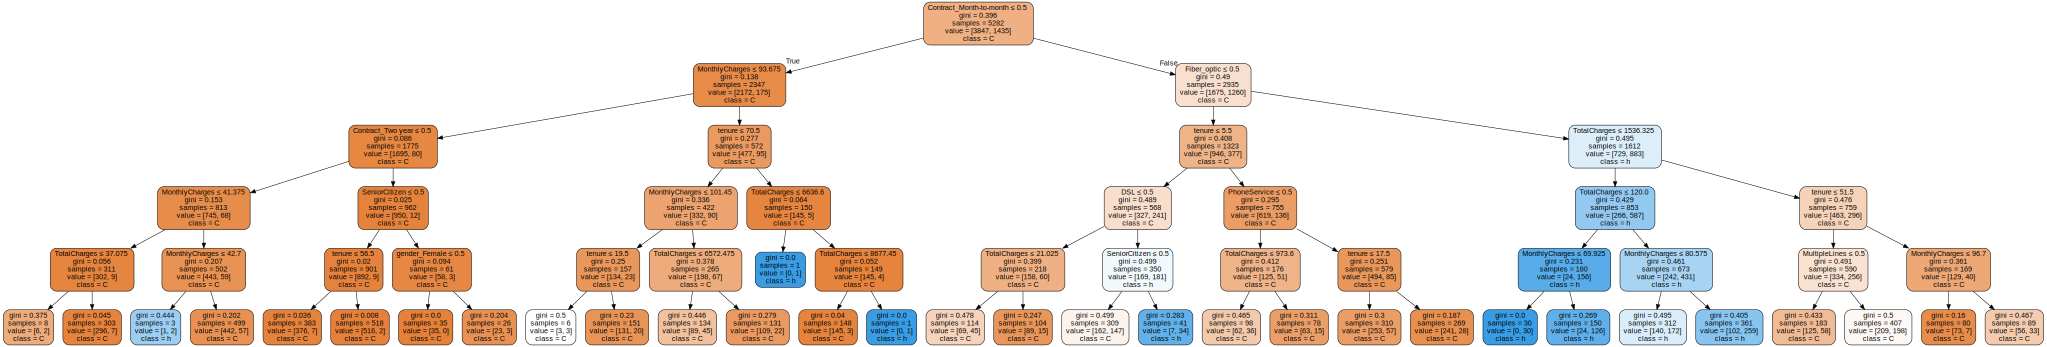

<Figure size 720x720 with 0 Axes>

In [365]:
from sklearn import tree
import graphviz

fig = plt.figure(figsize=(10, 10))

dot_data = tree.export_graphviz(decision_tree2, out_file=None, 
                     feature_names=X_train.columns,  
                     class_names="Churn",  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


<Figure size 720x576 with 0 Axes>

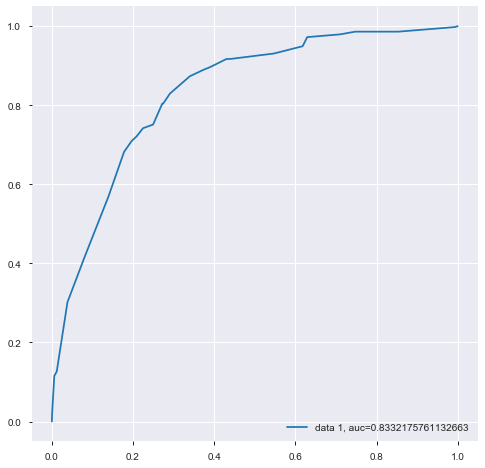

In [366]:
from sklearn.metrics import roc_curve

# Define the size of the figure

fig = plt.figure(figsize=(10, 8))

# Calculate the fpr and tpr for all thresholds of the 

from sklearn.metrics import roc_curve

y_pred_proba_dt2 = decision_tree2.predict_proba(X_test)[::,1]   #Predicted Probability
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba_dt2)
auc = metrics.roc_auc_score(Y_test, y_pred_proba_dt2)

fig = plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Decision Tree - Transforming Some Variables to Third New Models ¶

In [367]:
from sklearn.tree import DecisionTreeClassifier        # Import Decision Tree Classifier

# Create Decision Tree classifer object

decision_tree3 = DecisionTreeClassifier(criterion="gini", max_depth= 6)

# Train Decision Tree Classifer

decision_tree3 = decision_tree3.fit(X_train,Y_train)

# Predict the response for test dataset

y_pred_3 = decision_tree3.predict(X_test)

# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_3))

Accuracy: 0.7989778534923339


# Model Evaluation

In [368]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
y_pred_3 = decision_tree3.predict(X_train)
probs_3 = decision_tree3.predict_proba(X_train)
print(confusion_matrix(Y_train, y_pred_3))

[[3437  410]
 [ 615  820]]


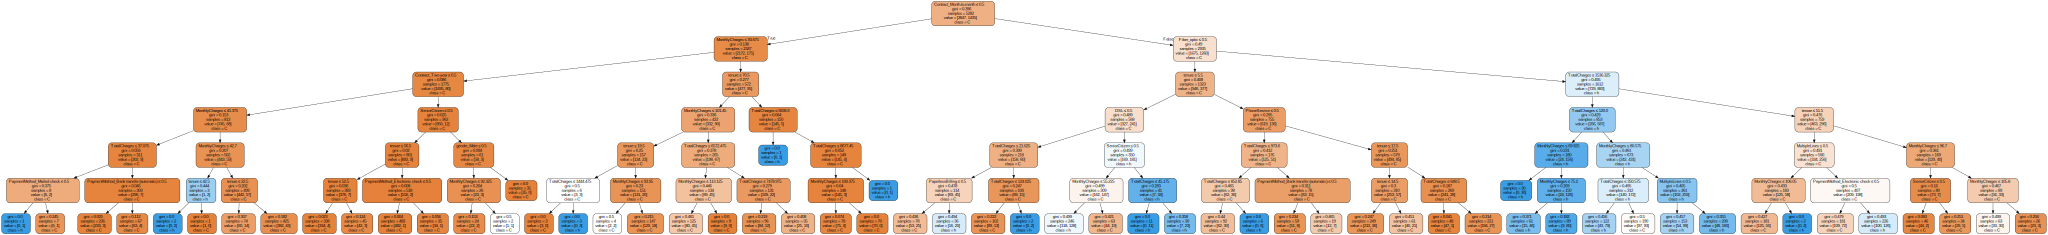

<Figure size 720x720 with 0 Axes>

In [369]:
from sklearn import tree
import graphviz

fig = plt.figure(figsize=(10, 10))

dot_data = tree.export_graphviz(decision_tree3, out_file=None, 
                     feature_names=X_train.columns,  
                     class_names="Churn",  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


<Figure size 720x576 with 0 Axes>

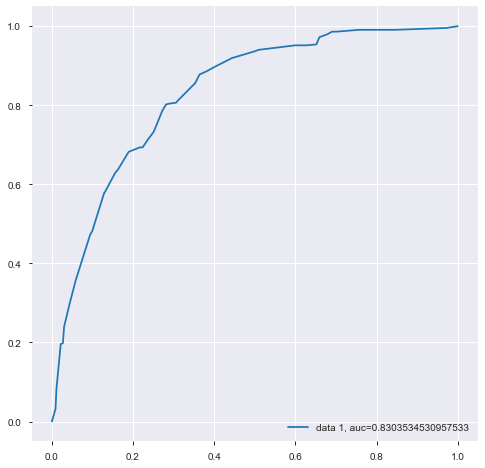

In [370]:
from sklearn.metrics import roc_curve

# Define the size of the figure

fig = plt.figure(figsize=(10, 8))

# Calculate the fpr and tpr for all thresholds of the 

from sklearn.metrics import roc_curve

y_pred_proba_dt3 = decision_tree3.predict_proba(X_test)[::,1]   #Predicted Probability
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba_dt3)
auc = metrics.roc_auc_score(Y_test, y_pred_proba_dt3)

fig = plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Logistic Regression Model 

In [371]:
# Split dataset into training set and test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1) # 75% training and 25% test data

In [372]:
from sklearn.linear_model import LogisticRegression

In [373]:
model_LogReg = LogisticRegression()
model_LogReg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The output above outlines the various parameters or dials available to you to modify how the model is built. Experiment with different settings to generate different models using the same data and the same algorithm.

In [374]:
y_predict = model_LogReg.predict(X_test)

# Logistic Regression Feature Importance

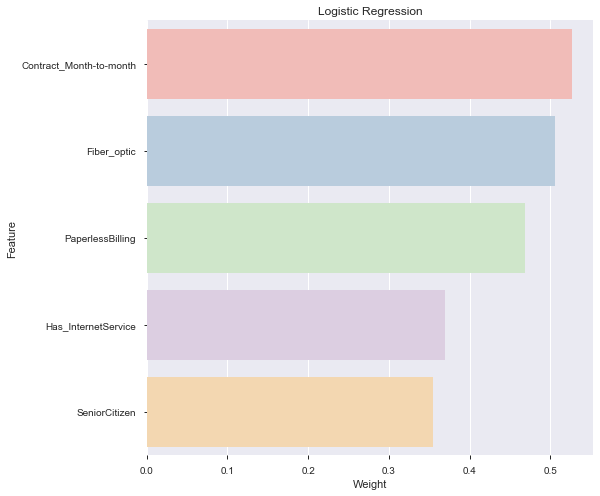

In [375]:
Rfclf_fea_2 = pd.DataFrame(model_LogReg.coef_[0])
Rfclf_fea_2["Feature"] = list(X_train) 
Rfclf_fea_2.sort_values(by=0, ascending=False).head()
fig = plt.figure(figsize=(8, 8))
# To use Seaborn to plot the barplot 
g = sns.barplot(0,"Feature",data = Rfclf_fea_2.sort_values(by=0, ascending=False)[0:5], palette="Pastel1",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("Logistic Regression")

Feature: 0, Score: 0.35465
Feature: 1, Score: 0.10089
Feature: 2, Score: -0.13764
Feature: 3, Score: -0.05873
Feature: 4, Score: -0.80247
Feature: 5, Score: 0.27488
Feature: 6, Score: 0.46845
Feature: 7, Score: 0.00447
Feature: 8, Score: 0.00025
Feature: 9, Score: -0.26612
Feature: 10, Score: -0.22842
Feature: 11, Score: 0.36899
Feature: 12, Score: 0.50544
Feature: 13, Score: -0.13645
Feature: 14, Score: -0.14761
Feature: 15, Score: -0.22566
Feature: 16, Score: 0.21793
Feature: 17, Score: -0.33920
Feature: 18, Score: 0.52656
Feature: 19, Score: -0.31243
Feature: 20, Score: -0.70867


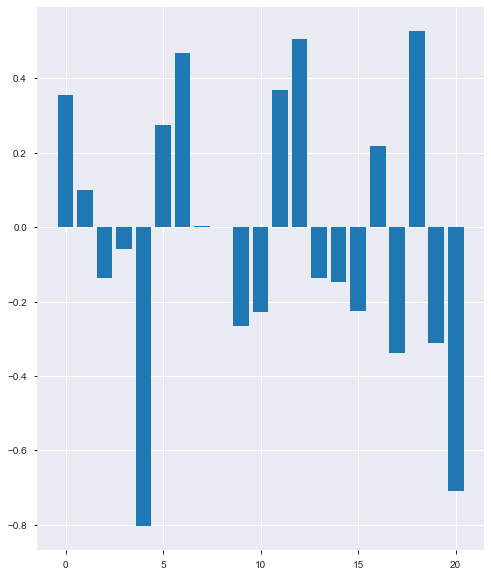

In [376]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression

# get importance
importance = model_LogReg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Evaluate the quality of predictions using the classification report function.

In [377]:
# import the metrics class

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

cnf_matrix = metrics.confusion_matrix(Y_test, y_predict)
cnf_matrix

array([[1187,  140],
       [ 189,  245]], dtype=int64)

In [378]:
print("Classification Report")
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, y_predict)))
print(metrics.classification_report(Y_test, y_predict, labels=[1,0]))

Classification Report
Accuracy: 0.8132
              precision    recall  f1-score   support

           1       0.64      0.56      0.60       434
           0       0.86      0.89      0.88      1327

    accuracy                           0.81      1761
   macro avg       0.75      0.73      0.74      1761
weighted avg       0.81      0.81      0.81      1761



The classification rate of 80%, considered as good accuracy for the model. 

Precision: Precision is about being precise, i.e., how accurate is the model. In other words, when a model makes a prediction, how often it is correct. In this prediction case, the Logistic Regression model could predict customer are going to churn from telecom service 80% of the time. 

Recall: If there are customer who want to churn in the test dataset and the Logistic Regression model can identify it 81% of the time.

Text(0.5, 384.16, 'Predicted label')

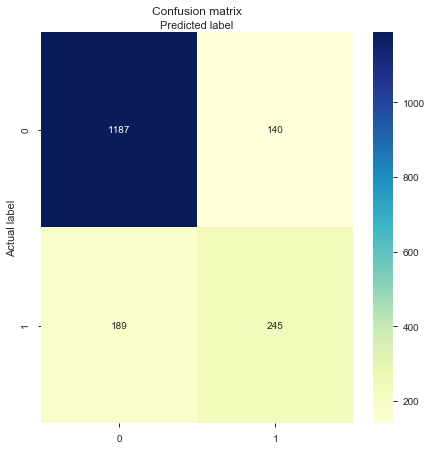

In [379]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 1870 and 407 are actual predictions, and 313 and 228 are incorrect predictions.

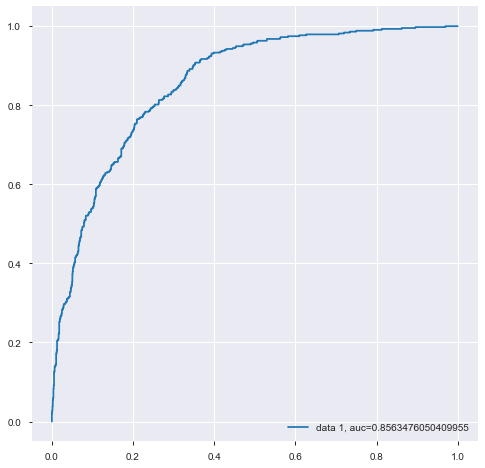

In [380]:
from sklearn.metrics import roc_curve

y_pred_proba = model_LogReg.predict_proba(X_test)[::,1]   #Predicted Probability
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

fig = plt.figure(figsize=(8, 8))

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC is an abbrevation for Area Under the Curve. It is used in classification analysis in order to determine which of the used models predicts the classes best. An example of its application are ROC curves. The true positive rates are plotted against false positive rates. From the figure above the AUC is 0.8563 and since an excellent performance model is the with AUC near to the 1 and this indicates that the model stored as 'model_LogReg' has good measure of separability.  This model has 85% chance that it will be able to distinguish between positive class and negative class

# Transforming Some Variables if Warranted to Produce the Second Models

In [381]:
# Split dataset into training set and test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=4) # 75% training and 25% test data

In [382]:
from sklearn.linear_model import LogisticRegression

In [383]:
model_LogReg2 = LogisticRegression()
model_LogReg2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [384]:
y_predict_2 = model_LogReg2.predict(X_test)

In [385]:
# Predict the accuracy of the New Model in order to compare it to the first model built
print("Classification Report")
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, y_predict_2)))
print(metrics.classification_report(Y_test, y_predict_2, labels=[1,0]))

Classification Report
Accuracy: 0.7950
              precision    recall  f1-score   support

           1       0.64      0.51      0.57       464
           0       0.84      0.90      0.87      1297

    accuracy                           0.80      1761
   macro avg       0.74      0.70      0.72      1761
weighted avg       0.78      0.80      0.79      1761



In [386]:
confusion_matrix(Y_test, y_predict_2)

array([[1163,  134],
       [ 227,  237]], dtype=int64)

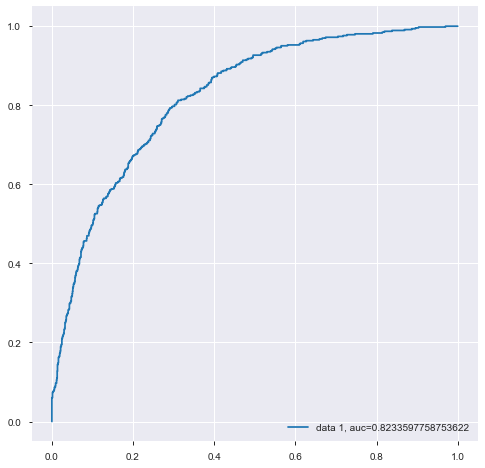

In [387]:
from sklearn.metrics import roc_curve

y_pred_proba_2 = model_LogReg2.predict_proba(X_test)[::,1]   #Predicted Probability
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba_2)
auc = metrics.roc_auc_score(Y_test, y_pred_proba_2)

fig = plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Transforming Some Variables if Warranted to Produce the Third Models  

In [388]:
# Importing StandardScaler library from Sklearn

from sklearn.preprocessing import StandardScaler

In order to consider whether New Model will be produced by transforming some of the variable, StandardScaler Library in Python were used. This Fit the Train and Test dataset

In [389]:
Std_Scale = StandardScaler()
X_train = Std_Scale.fit_transform(X_train)
X_test = Std_Scale.fit_transform(X_test)

In [390]:
# To avoid confusion of variable name, this new model will be stored as 'model_LogReg2'

# Import Logistic Regression model
model_LogReg3 = LogisticRegression()

# Fit the Train data
model_LogReg3.fit(X_train, Y_train)

# Predict the Test dataset
y_predict_3 = model_LogReg3.predict(X_test)

In [391]:
# Predict the accuracy of the New Model in order to compare it to the first model built
print("Classification Report")
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, y_predict_3)))
print(metrics.classification_report(Y_test, y_predict_3, labels=[1,0]))

Classification Report
Accuracy: 0.7922
              precision    recall  f1-score   support

           1       0.63      0.52      0.57       464
           0       0.84      0.89      0.86      1297

    accuracy                           0.79      1761
   macro avg       0.73      0.70      0.71      1761
weighted avg       0.78      0.79      0.79      1761



The accuracy of the first model built is 0.81 stored as model_LogReg and the second model is 0.81 stored as model_LogReg2 and third model is 0.79 stored in model_LogReg3. Therefore, the overall accuracy of the two models is the same. This means in this situation, tranforming the variable of the data had no impact on the model performance. The variables used as inputs for model_LogReg does not have drastical different ranges.

In [392]:
confusion_matrix(Y_test, y_predict_3)

array([[1156,  141],
       [ 225,  239]], dtype=int64)

The first model built has a confusion matrix output of 1870 and 407 correct or actual prediction and 313 and 228 incorrect prediction. The second model built has 1855 and 421 actual prediction and 299 and 243 incorrect prediction. This shows that the first model has higher model performance than the second model because of its higher diagonal values which represent accurate predictions. 

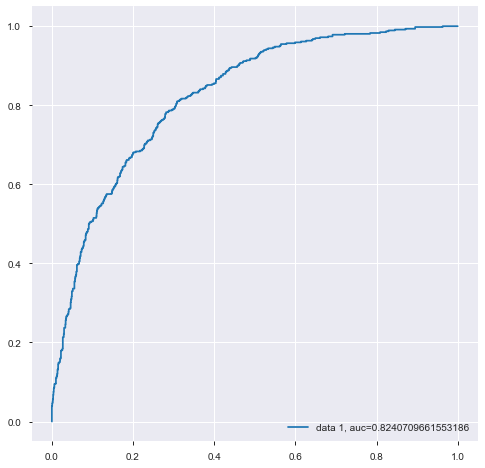

In [393]:
from sklearn.metrics import roc_curve

y_pred_proba_3 = model_LogReg3.predict_proba(X_test)[::,1]   #Predicted Probability
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba_3)
auc = metrics.roc_auc_score(Y_test, y_pred_proba_3)

fig = plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

The AUC for the third model is 0.8241 and this is a good model strored as 'model_LogReg'. The model with higher AUC is considered as the model with good performance. The model with 0.84 has 80% chance that the model will be able to distinguish between positive class and negative class. The second model has AUC ROC of 0.8233. However, the first model has the highest AUC ROC Curve with 0.8563 and it is has high performace of predicting churn aaccurately.


AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability.

When AUC is approximately 0, model is actually reciprocating the classes. It means, model is predicting negative class as a positive class and vice versa.

# Random Forest Model

A random forest classifier is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

The random forest combines hundreds or thousands of decision trees, trains each one on a slightly different set of the observations, splitting nodes in each tree considering a limited number of the features. The final predictions of the random forest are made by averaging the predictions of each individual tree.

In [394]:
# importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [395]:
# Print out the Random Forest Classifier directory
print(dir(RandomForestClassifier))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']


In [396]:
print(RandomForestClassifier())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [397]:
# Import RandomForest Classifier and indicates the number of tree
model_rf1 = RandomForestClassifier(n_estimators=200, random_state = 0)

In [398]:
from sklearn.ensemble import RandomForestClassifier


In [399]:
y_train_array = np.ravel(Y_train)

In [400]:
# Fit the train dataset
model_rf1.fit(X_train, y_train_array)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [401]:
# Make a prediction with the test dataset
model_rf1_predict = model_rf1.predict(X_test)


# Visualize or Print Random Forest Algorithm Model

In [402]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

In [403]:
fig = plt.figure(figsize=(12, 15))

tree_count = 0
for tree_in_random_forest in model_rf1.estimators_:
    if (tree_count ==1):        
        rfr_file = tree.export_graphviz(tree_in_random_forest, out_file=None)
        rfr_graph = pydotplus.graph_from_dot_data(rfr_file)        
    tree_count = tree_count + 1
Image(rfr_graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.610459 to fit



<Figure size 864x1080 with 0 Axes>

# Evaluate the quality of predictions using the classification report function

In [404]:
# import the metrics class

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

cnf_matrix_rf = metrics.confusion_matrix(Y_test, model_rf1_predict)
cnf_matrix_rf

array([[1135,  162],
       [ 224,  240]], dtype=int64)

In [405]:
print("Classification Report")
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, model_rf1_predict)))
print(metrics.classification_report(Y_test, model_rf1_predict, labels=[1,0]))

Classification Report
Accuracy: 0.7808
              precision    recall  f1-score   support

           1       0.60      0.52      0.55       464
           0       0.84      0.88      0.85      1297

    accuracy                           0.78      1761
   macro avg       0.72      0.70      0.70      1761
weighted avg       0.77      0.78      0.78      1761



In [406]:
print("Accuracy:",metrics.accuracy_score(Y_test, model_rf1_predict))
print("Precision:",metrics.precision_score(Y_test, model_rf1_predict))
print("Recall:",metrics.recall_score(Y_test, model_rf1_predict))

Accuracy: 0.7808063600227144
Precision: 0.5970149253731343
Recall: 0.5172413793103449


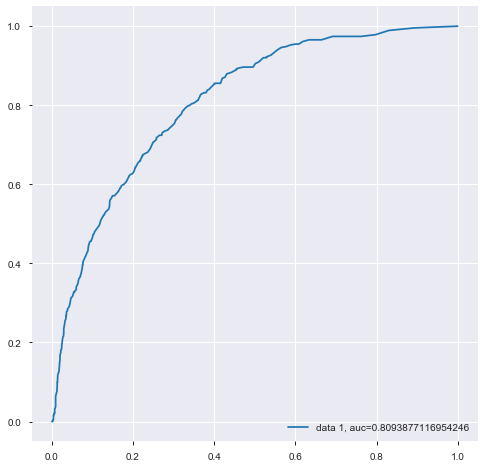

In [407]:
from sklearn.metrics import roc_curve

y_pred_proba_rf = model_rf1.predict_proba(X_test)[::,1]   #Predicted Probability
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba_rf)
auc = metrics.roc_auc_score(Y_test, y_pred_proba_rf)

fig = plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Consider Transforming Some Variables of Random Forest Compared with New Models Performance - 1st Time

In [408]:
# importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [409]:
# Import RandomForest Classifier and indicates the number of tree
model_rf2 = RandomForestClassifier(n_estimators=300, random_state = 4)

y_train_array2 = np.ravel(Y_train)

In [410]:
# Fit the train dataset
model_rf2.fit(X_train, y_train_array2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [411]:
# Make a prediction with the test dataset
model_rf2_predict = model_rf2.predict(X_test)


In [412]:
# Evaluate the performance of the model

# import the metrics class

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

cnf_matrix_rf2 = metrics.confusion_matrix(Y_test, model_rf2_predict)
cnf_matrix_rf2

array([[1137,  160],
       [ 228,  236]], dtype=int64)

In [413]:
print("Classification Report")
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, model_rf2_predict)))
print(metrics.classification_report(Y_test, model_rf2_predict, labels=[1,0]))

Classification Report
Accuracy: 0.7797
              precision    recall  f1-score   support

           1       0.60      0.51      0.55       464
           0       0.83      0.88      0.85      1297

    accuracy                           0.78      1761
   macro avg       0.71      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761



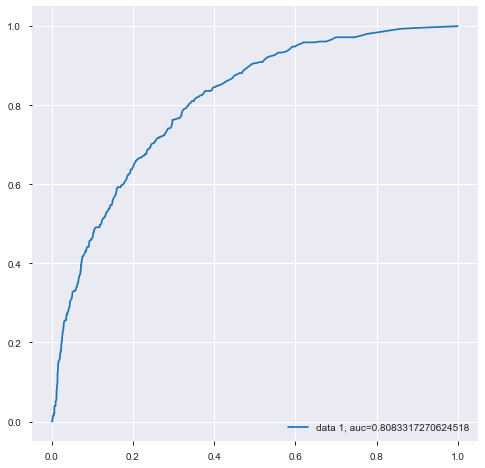

In [414]:
from sklearn.metrics import roc_curve

y_pred_proba_rf2 = model_rf2.predict_proba(X_test)[::,1]   #Predicted Probability
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba_rf2)
auc = metrics.roc_auc_score(Y_test, y_pred_proba_rf2)

fig = plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Consider Transforming Some Variables of Random Forest Compared with New Models Performance - 2nd Time

In [415]:
# importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [416]:
# Import RandomForest Classifier and indicates the number of tree
model_rf3 = RandomForestClassifier(n_estimators=500, random_state = 6)

y_train_array3 = np.ravel(Y_train)

In [417]:
# Fit the train dataset
model_rf3.fit(X_train, y_train_array3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [418]:
# Make a prediction with the test dataset
model_rf3_predict = model_rf3.predict(X_test)

In [419]:
# Evaluate the performance of the model

# import the metrics class

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

cnf_matrix_rf3 = metrics.confusion_matrix(Y_test, model_rf3_predict)
cnf_matrix_rf3

array([[1137,  160],
       [ 218,  246]], dtype=int64)

In [420]:
print("Classification Report")
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, model_rf3_predict)))
print(metrics.classification_report(Y_test, model_rf3_predict, labels=[1,0]))

Classification Report
Accuracy: 0.7853
              precision    recall  f1-score   support

           1       0.61      0.53      0.57       464
           0       0.84      0.88      0.86      1297

    accuracy                           0.79      1761
   macro avg       0.72      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761



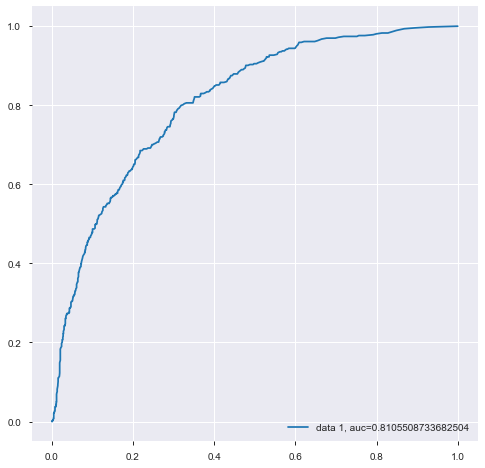

In [421]:
from sklearn.metrics import roc_curve

y_pred_proba_rf3 = model_rf3.predict_proba(X_test)[::,1]   #Predicted Probability
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba_rf3)
auc = metrics.roc_auc_score(Y_test, y_pred_proba_rf3)

fig = plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

 # K-Means Clustering - Unsupervised Learning

In [422]:
# Import K-Mean Clustering library

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [423]:
# Before starting K-Means Model, it is good to check the basic information of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   MultipleLines                            7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float64
 9   Churn                                    7043 non-null   int64  
 10  gender_Female                            7043 no

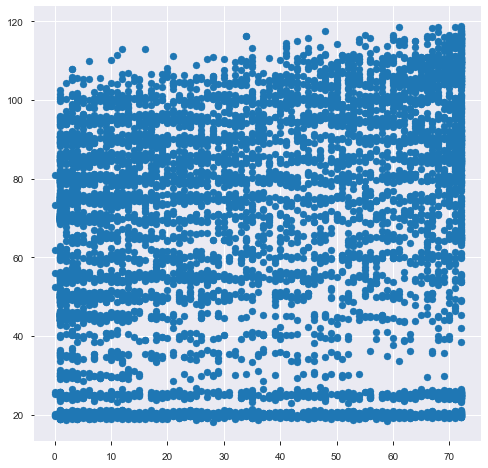

In [424]:
# Plotting simple scatterplot to visualize the two significant variables to be used for the clustering of customer churn
fig = plt.figure(figsize=(8, 8))
plt.scatter(data['tenure'], data['MonthlyCharges'])

In [425]:
# To Create a clustering scheme with 5 clusters.

model_kmeans = KMeans(n_clusters=5)          # use this for all inputs
model_kmeans_2vars = KMeans(n_clusters=5)    # use this for 2-input example below
model_kmeans
model_kmeans_2vars

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [426]:
model_kmeans_predict = model_kmeans.fit_predict(data)

In [427]:
model_kmeans_predict

array([2, 1, 2, ..., 2, 2, 0])

In [428]:
# To add "Cluster" to DataFrame 
data['Cluster']= model_kmeans_predict
data.head(10)

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
0              0        1           0       1             0              0   
1              0        0           0      34             1              0   
2              0        0           0       2             1              0   
3              0        0           0      45             0              0   
4              0        0           0       2             1              0   
5              0        0           0       8             1              1   
6              0        0           1      22             1              1   
7              0        0           0      10             0              0   
8              0        1           0      28             1              1   
9              0        0           1      62             1              0   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0                 1           29.85         29.85      0              1   
1                 0           56.95       1889.50      0              0   
2                 1           53.85        108.15      1              0   
3                 0           42.30       1840.75      0              0   
4                 1           70.70        151.65      1              1   
5                 1           99.65        820.50      1              1   
6                 1           89.10       1949.40      0              0   
7                 0           29.75        301.90      0              1   
8                 1          104.80       3046.05      1              1   
9                 0           56.15       3487.95      0              0   

   gender_Male  Has_InternetService  Fiber_optic  DSL  \
0            0                    1            0    1   
1            1                    1            0    1   
2            1                    1            0    1   
3            1                    1            0    1   
4            0                    1            1    0   
5            0                    1            1    0   
6            1                    1            1    0   
7            0                    1            0    1   
8            0                    1            1    0   
9            1                    1            0    1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   
5                                        0   
6                                        0   
7                                        0   
8                                        0   
9                                        1   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   
5                                      0                               1   
6                                      1                               0   
7                                      0                               0   
8                                      0                               1   
9                                      0                               0   

   PaymentMethod_Mailed check  Contract_Month-to-month  Contract_One year  \
0                           0                        1                  0   
1                           1                        0                  1   
2                           1                        1                  0   
3                           0         

In [429]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   MultipleLines                            7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float64
 9   Churn                                    7043 non-null   int64  
 10  gender_Female                            7043 no

In K-Means or Unsupervised Learning problem, there is no target variable to predict. Therefore, three important variables will be considered in the 'Clustering' - "Tenure", "MonthlyCharges" and "TotalCharges". This will make it easy to visualize the  data points. We will first considered "Tenure" and "MonthlyCharges" and later the "Tenure" and "TotalCharges".

Let’s check if there is any relationship between Tenure and MonthlyCharges.


Text(0, 0.5, 'MonthlyCharges')

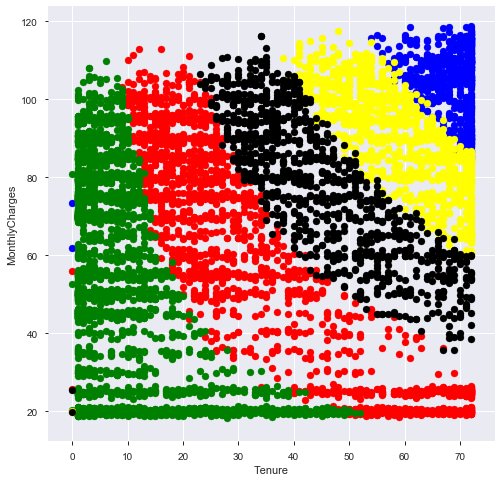

In [430]:
# Subset your dataset into 5 cluster subsets (dataframes)


fig = plt.figure(figsize=(8, 8))

C0 = data[data.Cluster == 0]
C1 = data[data.Cluster == 1]
C2 = data[data.Cluster == 2]
C3 = data[data.Cluster == 3]
C4 = data[data.Cluster == 4]

plt.scatter(C0.tenure, C0.MonthlyCharges, color='blue')
plt.scatter(C1.tenure, C1.MonthlyCharges, color='red')
plt.scatter(C2.tenure, C2.MonthlyCharges, color='green')
plt.scatter(C3.tenure, C3.MonthlyCharges, color='yellow')
plt.scatter(C4.tenure, C4.MonthlyCharges, color='black')

plt.xlabel('Tenure')
plt.ylabel('MonthlyCharges')

This Serves as the Experimental Phase

The 2-Dimensional plot above does not show clear separation between the different clusters, because the cluster were not built using only 2 dimensions variable (Tenure and MonthlyCharges). However, the clusters were build using all the variables in the "data DataFrame" databaset.

# Creating Another Clustering Scheme using only Two Input Variables "Tenure" and "MonthlyCharges"

In [431]:
# For visualization convenience, two input variables will be used 'Tenure' and 'MonthlyCharges'.
# Calling the two columns needed for the clustering scheme and stored it as "data_2"
data_2 = data[['tenure', 'MonthlyCharges']]  
data_2.head(7)

tenure  MonthlyCharges
0       1           29.85
1      34           56.95
2       2           53.85
3      45           42.30
4       2           70.70
5       8           99.65
6      22           89.10

In [432]:
# Fit the K-means cluster
model_kmeans_predict_2 = model_kmeans_2vars.fit_predict(data_2)


In [433]:
# Adding the 'Cluster' column to the two variables columns
data_2['Cluster']= model_kmeans_predict_2
data_2.head(7)

tenure  MonthlyCharges  Cluster
0       1           29.85        3
1      34           56.95        2
2       2           53.85        3
3      45           42.30        1
4       2           70.70        0
5       8           99.65        0
6      22           89.10        0

# Plotting the 5 Clusters using Only the Two Variables 

Text(0, 0.5, 'MonthlyCharges')

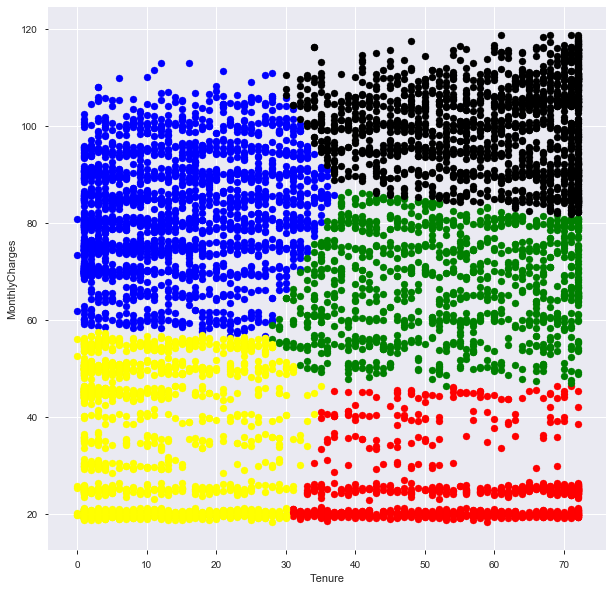

In [434]:
# Subset your dataset into 5 cluster subsets (dataframes)

fig = plt.figure(figsize=(10, 10))

C0_2 = data[data_2.Cluster == 0]
C1_2 = data[data_2.Cluster == 1]
C2_2 = data[data_2.Cluster == 2]
C3_2 = data[data_2.Cluster == 3]
C4_2 = data[data_2.Cluster == 4]


plt.scatter(C0_2.tenure, C0_2.MonthlyCharges, color='blue')
plt.scatter(C1_2.tenure, C1_2.MonthlyCharges, color='red')
plt.scatter(C2_2.tenure, C2_2.MonthlyCharges, color='green')
plt.scatter(C3_2.tenure, C3_2.MonthlyCharges, color='yellow')
plt.scatter(C4_2.tenure, C4_2.MonthlyCharges, color='black')

plt.xlabel('Tenure')
plt.ylabel('MonthlyCharges')


Using only two inputs variables in the scatter plot above on K-means clusters has shown that the algorithm work perfectly. The Clusters are well-defiend and fairly separated as shown in the 2-D visualization above.  

Based on Monthly Charges and Tenure, There are 5 types of clusters as highlighted below:

Low Tenure and Low Monthly Charges (Yellow)

Low Tenure and Moderate/High Monthly Charges (Black)

High Tenure and Low Monthly Charges (Red)

High Tenure and Moderate/High Monthly Charges (Blue)

High Tenure and High Monthly Charges (Green)

# Using the Original Clustering with All the Inputs
This will display the centers of the clusters created and it will be display the centre as multi-dimensional since it is multiple inputs, i.e. all the inputs are being used.

In [435]:
# For all inputs or multple inputs
model_kmeans.cluster_centers_

array([[2.24919094e-01, 7.68608414e-01, 3.49514563e-01, 6.80631068e+01,
        1.00000000e+00, 9.01294498e-01, 7.44336570e-01, 1.04564887e+02,
        7.15571432e+03, 1.22977346e-01, 4.91909385e-01, 5.08090615e-01,
        1.00000000e+00, 8.83495146e-01, 1.16504854e-01, 3.33333333e-01,
        3.57605178e-01, 2.70226537e-01, 3.88349515e-02, 1.05177994e-01,
        2.63754045e-01, 6.31067961e-01],
       [1.51807229e-01, 5.17469880e-01, 3.23493976e-01, 3.57331325e+01,
        8.80722892e-01, 4.22289157e-01, 5.53614458e-01, 5.76528313e+01,
        1.58913367e+03, 2.24698795e-01, 4.93975904e-01, 5.06024096e-01,
        7.13855422e-01, 3.63253012e-01, 3.50602410e-01, 2.46385542e-01,
        2.36746988e-01, 3.18072289e-01, 1.98795181e-01, 5.24698795e-01,
        1.99397590e-01, 2.75903614e-01],
       [1.22198880e-01, 3.09173669e-01, 2.59103641e-01, 9.87710084e+00,
        8.90056022e-01, 1.95728291e-01, 5.28711485e-01, 4.79783613e+01,
        3.50162325e+02, 3.70448179e-01, 4.98249300e-01

In [436]:
# for 2-input variables example above
model_kmeans_2vars.cluster_centers_ 

array([[ 13.44758654,  81.81601658],
       [ 54.03961585,  24.83073229],
       [ 53.53923541,  67.59330986],
       [ 10.41916859,  32.83718245],
       [ 58.70900209, 100.18576413]])

In [437]:
# Let’s evaluate how well the formed clusters are. To do that, we will calculate the inertia of the clusters:

# inertia on the fitted data
model_kmeans.inertia_

1331181430.4811914

We got an inertia value of almost 13312. Now, let’s see how we can use the elbow curve to determine the optimum number of clusters.

# Elbow Method to Know the Best Number of Clusters

Different number of clusters will be used in this case to experiment with elbow method in order to figure out the best number of clusters to use.

The main goal is to minimize the within the cluster sum of square and maximize the distance between clusters.

In [438]:
k_trials = range(1,15)
sum_squared_error = []
for k in k_trials:
    km_model = KMeans(n_clusters=k)
    km_model.fit(data)
    sum_squared_error.append(km_model.inertia_)

In [439]:
sum_squared_error

[36203128561.7744,
 7936372227.088985,
 3705277605.827181,
 2118879450.144047,
 1331127639.6277344,
 918224252.8449376,
 673441234.1695757,
 525008516.0440524,
 414843556.02165747,
 330058428.21225166,
 270868831.74543446,
 230900309.08232522,
 197254816.75619948,
 168692542.53233922]

# Visualizing the Elbow Method

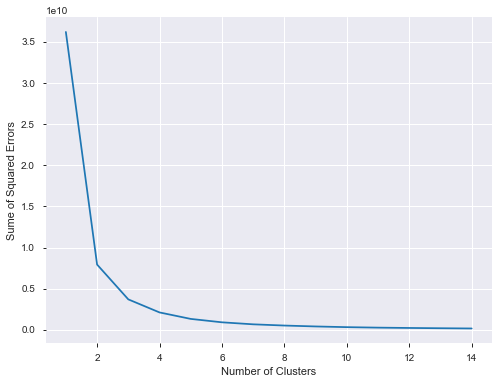

In [440]:
fig = plt.figure(figsize=(8, 6))

plt.xlabel('Number of Clusters')
plt.ylabel('Sume of Squared Errors')
plt.plot(k_trials, sum_squared_error)

In [441]:
# Experimenting with 6 cluster to figure out which is the best number of clusters
model_kmeans = KMeans(n_clusters=6)          # use this for all inputs
model_kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [442]:
k_trials = range(1,15)
sum_squared_error = []
for k in k_trials:
    km_model= KMeans(n_clusters=k)
    km_model.fit(data)
    sum_squared_error.append(km_model.inertia_)

In [443]:
sum_squared_error

[36203128561.7744,
 7936366301.269801,
 3705277605.827181,
 2118879450.144047,
 1331187600.089826,
 918217862.9704115,
 673440371.5553977,
 524872656.5964936,
 414852708.31582946,
 330091683.31695235,
 270858614.0012873,
 231939603.9767266,
 197254816.75619948,
 169255815.2734904]

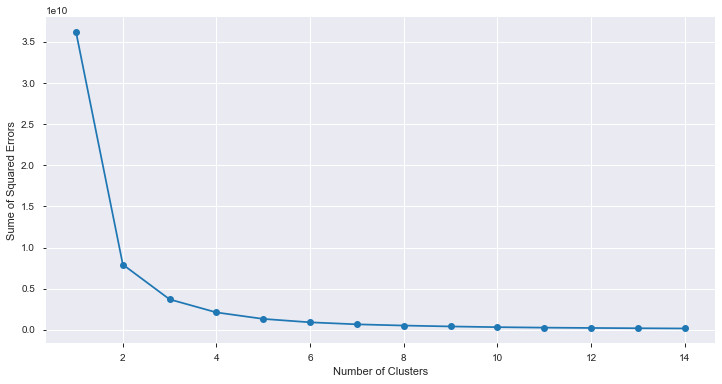

In [444]:
fig = plt.figure(figsize=(12, 6))

plt.xlabel('Number of Clusters')
plt.ylabel('Sume of Squared Errors')
plt.plot(k_trials, sum_squared_error, marker='o')

In [445]:
# Experimenting with 7 cluster to figure out which is the best number of clusters
model_kmeans = KMeans(n_clusters=7)          # use this for all inputs
model_kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [446]:
k_trials = range(1,15)
sum_squared_error = []
for k in k_trials:
    km_model = KMeans(n_clusters=k)
    km_model.fit(data)
    sum_squared_error.append(km_model.inertia_)

In [447]:
sum_squared_error

[36203128561.7744,
 7936367853.534911,
 3705277605.827181,
 2118879450.144047,
 1331187600.089826,
 918025467.4676123,
 673237757.7062013,
 524617287.54321975,
 414904057.9982965,
 330295800.1959444,
 270860692.14308363,
 230934839.79873922,
 197225561.61166292,
 168663949.64721337]

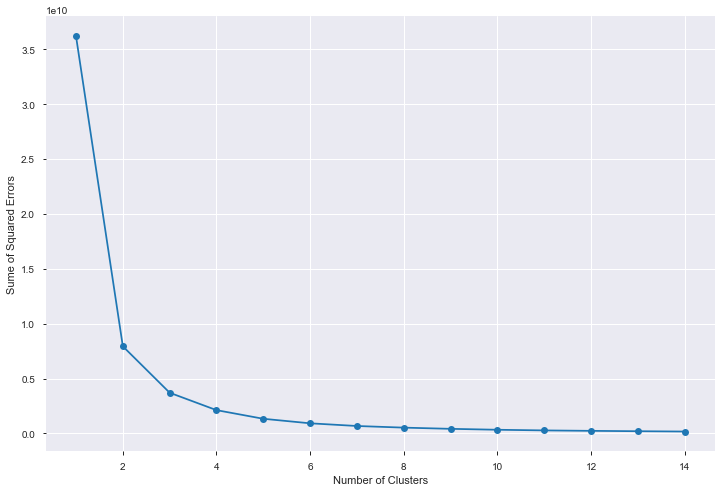

In [448]:
fig = plt.figure(figsize=(12, 8))

plt.xlabel('Number of Clusters')
plt.ylabel('Sume of Squared Errors')
plt.plot(k_trials, sum_squared_error, marker='o')

In [449]:
# Experimenting with 8 cluster to figure out which is the best number of clusters
model_kmeans = KMeans(n_clusters=8)          # use this for all inputs
model_kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [450]:
k_trials = range(1,15)
sum_squared_error = []
for k in k_trials:
    km_model = KMeans(n_clusters=k)
    km_model.fit(data)
    sum_squared_error.append(km_model.inertia_)

In [451]:
sum_squared_error

[36203128561.7744,
 7936366301.269801,
 3705277605.827181,
 2118879450.144047,
 1331181430.4877644,
 918224252.8449376,
 673267647.8908106,
 525085535.0235913,
 414851431.2968123,
 330086634.7929393,
 270859829.7017329,
 230922259.92124265,
 197297320.0780572,
 168722028.5409896]

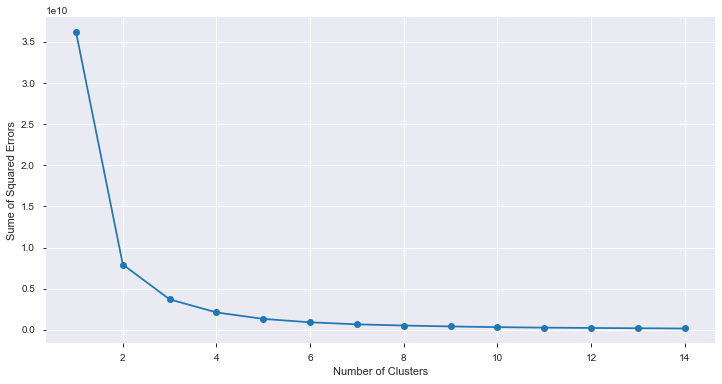

In [452]:
fig = plt.figure(figsize=(12, 6))

plt.xlabel('Number of Clusters')
plt.ylabel('Sume of Squared Errors')
plt.plot(k_trials, sum_squared_error, marker='o')

From the various elbow curve shown above using number of clusters from (5 to 8). Any number of clusters between 3 to 5 can be chosen. Therefore, the optimal K for the dataset is 5 and the model can fit. 